In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['total spend']=df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


# regression plot

<Axes: xlabel='total spend', ylabel='sales'>

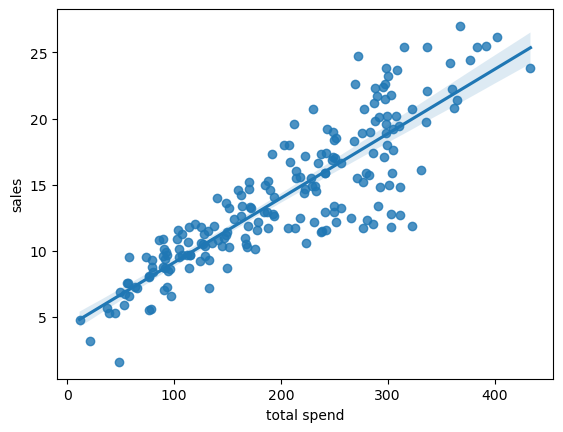

In [7]:
sns.regplot(x=df['total spend'], y=df['sales'])

In [11]:
df[['total spend' , 'sales']].corr()

,total spend,sales
total spend,1.000000,0.867712
sales,0.867712,1.000000


# calculate Beta_1 , Beta_0 VS np.polyfit()

In [37]:
X=df['total spend']
y=df['sales']



def s_linear_regression(x,y):
    X_mean=X.mean()
    y_mean=y.mean()
    numerator=sum([(x_i - X_mean)*(y_i - y_mean) for x_i , y_i in zip(x,y)])
    denumerator=sum([((x_i - X_mean)**2)for x_i in x])

    beta_1=numerator/denumerator
    beta_0=y_mean -(beta_1* X_mean)

    return beta_1 , beta_0



s_linear_regression(df['total spend'] , df['sales'])

(0.04868787931904819, 4.243028216036322)

In [42]:
np.polyfit(X,y,1)#degree of equation

array([0.04868788, 4.24302822])

# gradian descent

In [52]:
x=np.array([1,2,3,4,5])
y=np.array([2,3,4,5,6])
n=len(y)

beta_1 , beta_0 = 0.0 , 0.0

y_pred=beta_1 * x + beta_0
grad_beta_1= (-2/n) * np.sum(x * (y - y_pred))
grad_beta_0= (-2/n) * np.sum(y - y_pred)


beta_1 = beta_1 - 0.01*grad_beta_1#learning rate=0.01
beta_0 = beta_0 - 0.01*grad_beta_0
beta_1 , beta_0

(0.28, 0.08)

In [65]:
def gradient_descent_1(x , y , learning_rate=0.01 , num_steps=100):
    n=len(y)

    beta_1 , beta_0 = 0.0 , 0.0

    for _ in range(num_steps):
        y_pred=beta_1 * x + beta_0
        grad_beta_1= (-2/n) * np.sum(x * (y - y_pred))
        grad_beta_0= (-2/n) * np.sum(y - y_pred)
        
        
        beta_1 = beta_1 - learning_rate*grad_beta_1
        beta_0 = beta_0 - learning_rate*grad_beta_0
    return beta_1 , beta_0

In [67]:
beta_1 , beta_0=gradient_descent_1(x , y , num_steps=10000)
beta_1 , beta_0

(1.0000000000000067, 0.9999999999999772)

In [69]:
def gradient_descent_2(x1 , x2 , y , learning_rate=0.01 , num_steps=100):
    n=len(y)

    beta_2 ,beta_1 , beta_0 = 0.0 , 0.0 , 0.0

    for _ in range(num_steps):
        y_pred=(beta_2 * x2 )+ (beta_1 * x1 )+ beta_0
        grad_beta_2= (-2/n) * np.sum(x2 * (y - y_pred))
        grad_beta_1= (-2/n) * np.sum(x1 * (y - y_pred))
        grad_beta_0= (-2/n) * np.sum(y - y_pred)
        
        beta_2 = beta_2 - learning_rate*grad_beta_2
        beta_1 = beta_1 - learning_rate*grad_beta_1
        beta_0 = beta_0 - learning_rate*grad_beta_0
    return beta_2 , beta_1 , beta_0